# Assignment 4: Hough Transform

## Ex. 4.1 Detect lanes and eyes

* there are two datasets available: "images/eye_tracking" and "images/lane_detection" - decide for one of them
* implement the classical Hough Transform for lines (for lane detection) **OR** circles (eye tracking) as shown in the lecture
* use a Canny edge detector to produce edge images for the sequence of images

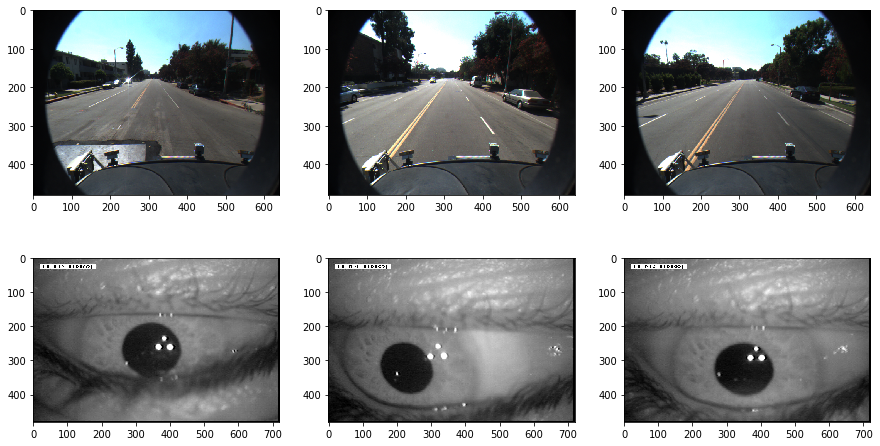

In [5]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

lane1 = io.imread('images/lane_detection/f00000.png')
lane2 = io.imread('images/lane_detection/f00050.png')
lane3 = io.imread('images/lane_detection/f00090.png')

eye1 = io.imread('images/eye_tracking/0000.jpeg')
eye2 = io.imread('images/eye_tracking/0050.jpeg')
eye3 = io.imread('images/eye_tracking/0090.jpeg')

fig = plt.figure(figsize=(15, 8))
ax11 = plt.subplot(2, 3, 1)
ax12 = plt.subplot(2, 3, 2)
ax13 = plt.subplot(2, 3, 3)
ax21 = plt.subplot(2, 3, 4)
ax22 = plt.subplot(2, 3, 5)
ax23 = plt.subplot(2, 3, 6)


ax11.imshow(lane1)
ax12.imshow(lane2)
ax13.imshow(lane3)

ax21.imshow(eye1)
ax22.imshow(eye2)
ax23.imshow(eye3)

In [6]:
from queue import Queue

from skimage.feature import canny
from skimage.color import rgb2gray


def get_accumulator(img, *, discretes_per_degree=1, subtract_from_max_r=1, canny_kwargs={}, n_max=1):
    gray_img = rgb2gray(img)
    edge_img = canny(gray_img, **canny_kwargs).astype(np.int)
#     io.imshow(edge_img)
#     print(np.where(edge_img == True))
    angles = np.linspace(0, np.pi, num=180*discretes_per_degree, endpoint=True)
    max_r = int(np.sqrt(img.shape[0]**2 + img.shape[1]**2))
    A = np.zeros((max_r - subtract_from_max_r, len(angles)))
    print('A', A.shape)
    rr, cc = np.where(edge_img == True)
    # Precompute 'cos' and 'sin' for all discrete angles.
    angle_matrix = np.array([np.cos(angles), np.sin(angles)])
    indices = np.array([rr, cc]).T
    print(indices.shape, '×', angle_matrix.shape, '=', (indices @ angle_matrix).shape)
    # Matrix of all values of 'r'.
#     print(indices @ angle_matrix)
    R = np.round(indices @ angle_matrix).astype(np.int)
    print(R)
    A_
    
    return
    
    max_vals = Queue(maxsize=n_max)
    
    print(edge_img[rr, cc])
    for x, y in zip(rr, cc):
        for a_i, a in enumerate(angles):
            r = int(np.round(x*np.cos(a) + y*np.sin(a)))
            A[r, a_i] += 1
    plt.imshow(A, cmap='gray')
    return A
    
acc = get_accumulator(lane1, discretes_per_degree=1, subtract_from_max_r=100, canny_kwargs=dict(sigma=1.7))


A (700, 180)
(9323, 2) × (2, 180) = (9323, 180)
[[   1    3    5 ...    3    1   -1]
 [   1    3    5 ...    3    1   -1]
 [   1   10   19 ...   17    8   -1]
 ...
 [ 478  484  489 ... -466 -472 -478]
 [ 478  484  489 ... -466 -472 -478]
 [ 478  484  490 ... -465 -472 -478]]


NameError: name 'A_' is not defined

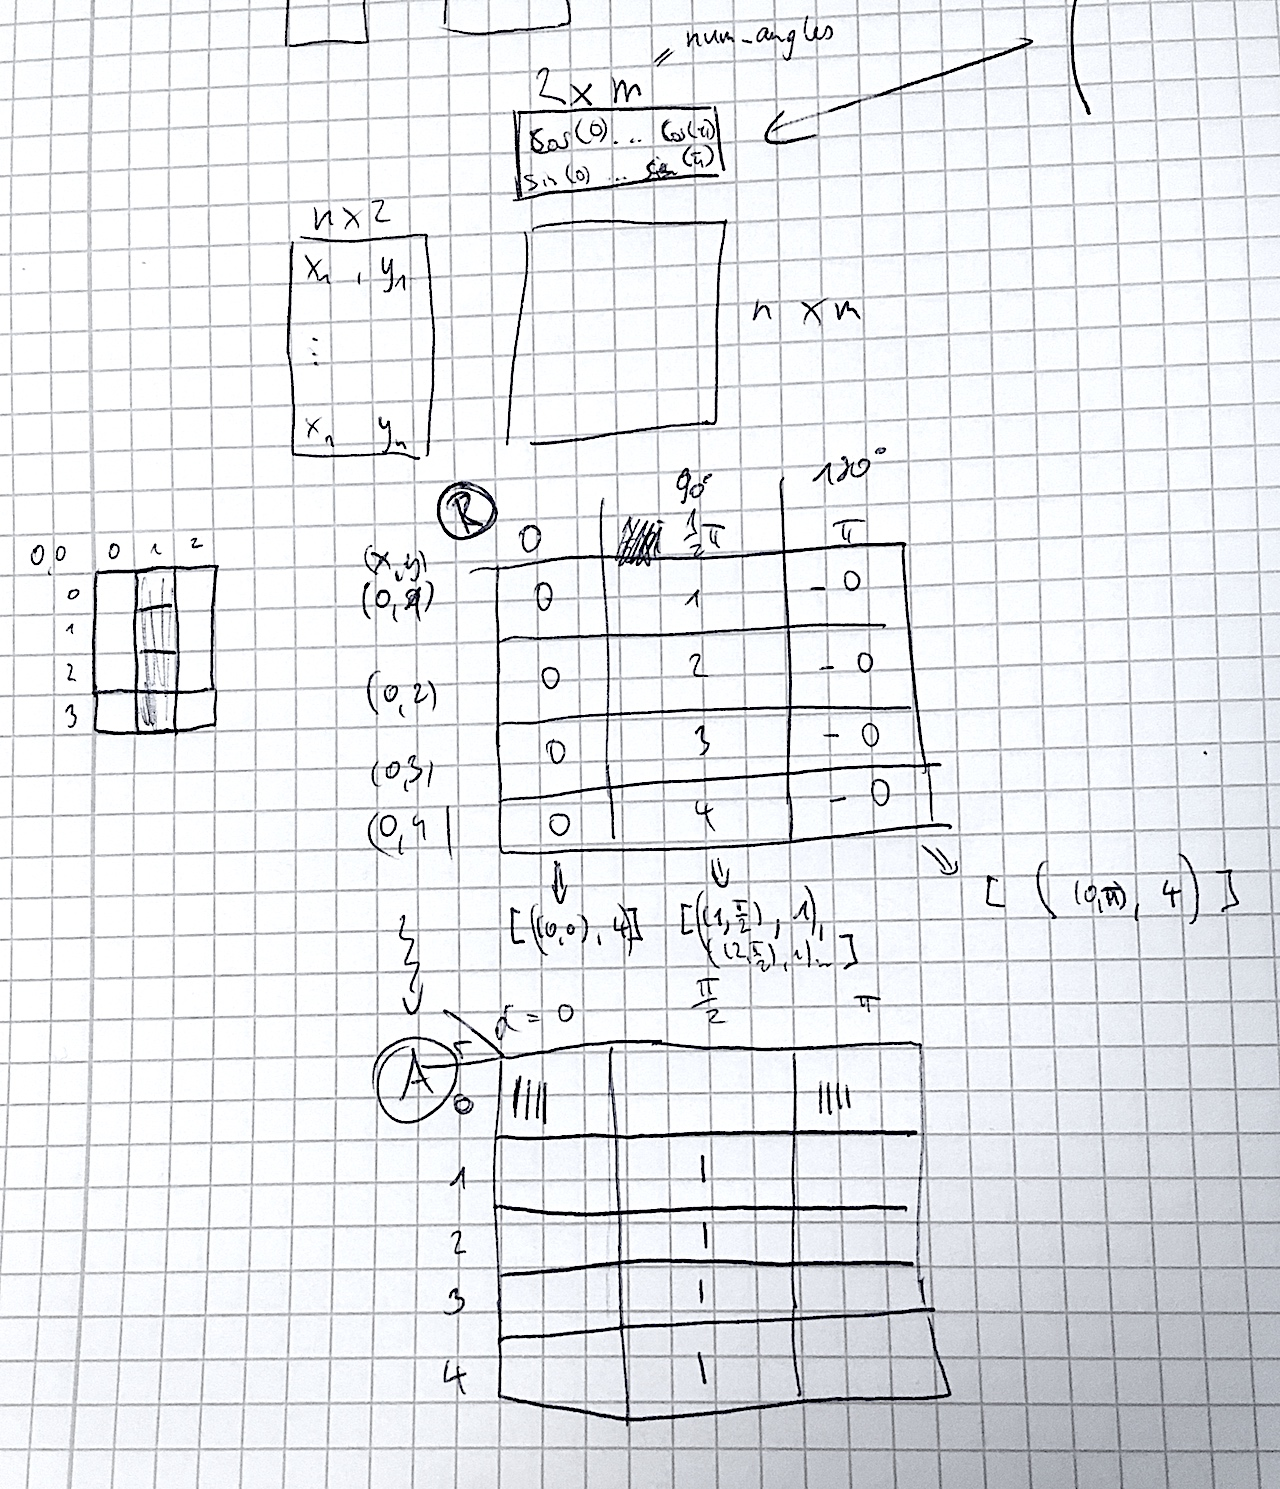

In [ ]:
m = np.array([ [0,1,0], [0,2,0], [0,3,0], [0,4,0] ])
print(np.unique(m[:,0], return_counts=True, axis=0))
# (array([0]), array([4]))
# => hard-coded index 0 (angle index in 'angles'), [0], [4]

print(np.unique(m[:,1], return_counts=True, axis=0))
# (array([1, 2, 3, 4]), array([1, 1, 1, 1]))
# => hard-coded index 1 (angle index), [1,2,3,4], [1,1,1,1]

print(np.unique(m[:,2], return_counts=True, axis=0))
# (array([0]), array([4]))
# equals to col zero but for another angle

In [ ]:
frames = io.imread_collection("images/lane_detection/*")

for frame in frames:
    acc = get_accumulator(lane1, discretes_per_degree=1, subtract_from_max_r=100)
    

In [ ]:
# dieser Code wurde als Musterlösung von Sebastian Oltmanns zur Verfügung gestellt und von Tim renoviert

%matplotlib inline
from skimage.draw import line
from skimage import io
import math
import numpy as np

def draw_line_hessian_normal(image, a, r):
    
    (dimy,dimx) = image.shape

    #r = x*cosa + y*sina

    # compute start and end point of line 
    x0 = 0
    y0 = round((r - x0*math.cos(math.radians(a)))/math.sin(math.radians(a)))
    x1 = dimx
    y1 = round((r - x1*math.cos(math.radians(a)))/math.sin(math.radians(a)))

    liney,linex = line(y0,x0,y1,x1)
    
    ret = np.copy(image)
    for yy in range(0,liney.size-1):
        if (liney[yy] > 0) and (liney[yy] < dimy-1):
            ret[liney[yy],linex[yy]] = 1
    return ret

image = np.zeros((100,100))
# image = draw_line_hessian_normal(image, 20, 60)
# image = draw_line_hessian_normal(image, 20, 10)
# image = draw_line_hessian_normal(image, 110, 0)
# image = draw_line_hessian_normal(image, -70, 10)
# image = draw_line_hessian_normal(image, 135, -20)
image = draw_line_hessian_normal(image, 0.1, 1)
plt.imshow(image, cmap='gray')

## OPTION 1: line detection for lane detection 

* use your implementation of the Hough Transform to find the 10 strongest lines in the image
* display your result set (draw those lines on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw lines again! (**BONUS**)

## OPTION 2: circle detection for eye detection
* use your implementation of the Hough Transform to find the 10 strongest circles in the image
* display your result set (draw those circles on the image) (**RESULT**)
* can you improve the performance by limiting the space of solutions? implement and draw circles again! (**BONUS**)

In [ ]:
None

# Ex. 4.2 Generalized Hough Transform

* implement the Generalized Hough Transform as described in the lecture for localizing a given template
* find the given template (see below) and mark its location in the image "animals.png" (**RESULT**)

[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 ...
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


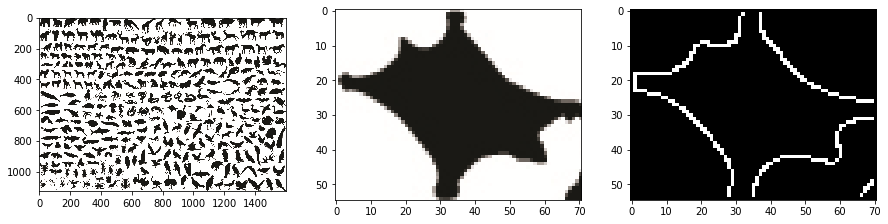

In [54]:
%matplotlib inline 
import matplotlib.pyplot as plt
from skimage import io, data, feature, color
import numpy as np

animals = io.imread('images/animals.png')

# xmin = 1271
# xmax = 1381
# ymin = 519
# ymax = 561
xmin = 826
xmax = xmin + 71
ymin = 562
ymax = ymin + 55

bat = animals[ymin:ymax, xmin:xmax]
# bat_edge = feature.canny(color.rgb2gray(bat), 2)[2:8, 48:54]
bat_edge = feature.canny(color.rgb2gray(bat), 2)
print(bat_edge)

fig = plt.figure(figsize=(15, 10))
ax1 = plt.subplot(1, 3, 1)
ax2 = plt.subplot(1, 3, 2)
ax3 = plt.subplot(1, 3, 3)

ax1.imshow(animals)
ax2.imshow(bat)
ax3.imshow(bat_edge, cmap='gray')

In [8]:
from numpy import linalg as LA

#get center of the template
shape_x, shape_y = bat_edge.shape
center = (int(shape_x / 2), int(shape_y / 2))

#build an r-table with 20° theta steps
NUMBER_BINS = 19

r_table_vanilla = []
r_table = np.ndarray(shape=(NUMBER_BINS,1), dtype=float, order='F')


for i in range(shape_x):
    for j in range(shape_y):
        focus = bat_edge[i,j]
        if(focus != 0.0):
            dist_x = i - center[0]
            dist_y = j - center[1]
            v = LA.norm((dist_x, dist_y))
            #print(v)
            
            angle = np.degrees(np.arctan2(dist_x, dist_y))
            #print(angle)
            bins = np.linspace(-180, 180, num=NUMBER_BINS)
            index = np.digitize(angle, bins)
            theta = bins[(index - 1) % 18]
            
            r_table_vanilla.append((theta, v))
            np.append(r_table, (theta, v))

#print(r_table_vanilla)
print(r_table)

#locate the object

[[-2.31584178e+077]
 [-2.31584178e+077]
 [ 4.94065646e-323]
 [ 3.95252517e-323]
 [-2.00389506e+000]
 [-1.49457321e-154]
 [ 3.95252517e-323]
 [-2.00389506e+000]
 [-2.31584178e+077]
 [ 4.17201348e-309]
 [ 9.88131292e-324]
 [ 9.88131292e-324]
 [ 7.90505033e-323]
 [ 3.95252517e-323]
 [-2.68678400e+154]
 [-2.31584178e+077]
 [ 1.48219694e-323]
 [ 1.48219694e-323]
 [-2.31584178e+077]]


[-180. -160. -140. -120. -100.  -80.  -60.  -40.  -20.    0.   20.   40.
   60.   80.  100.  120.  140.  160.  180.]
[[   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]
 ...
 [   0.    0.    0. ... -140. -140.    0.]
 [   0.    0.    0. ... -140.    0.    0.]
 [   0.    0.    0. ...    0.    0.    0.]]
[[0. 0. 1. ... 0. 0. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 2. ... 2. 1. 0.]
 [1. 1. 0. ... 0. 3. 1.]
 [3. 1. 0. ... 0. 0. 3.]]


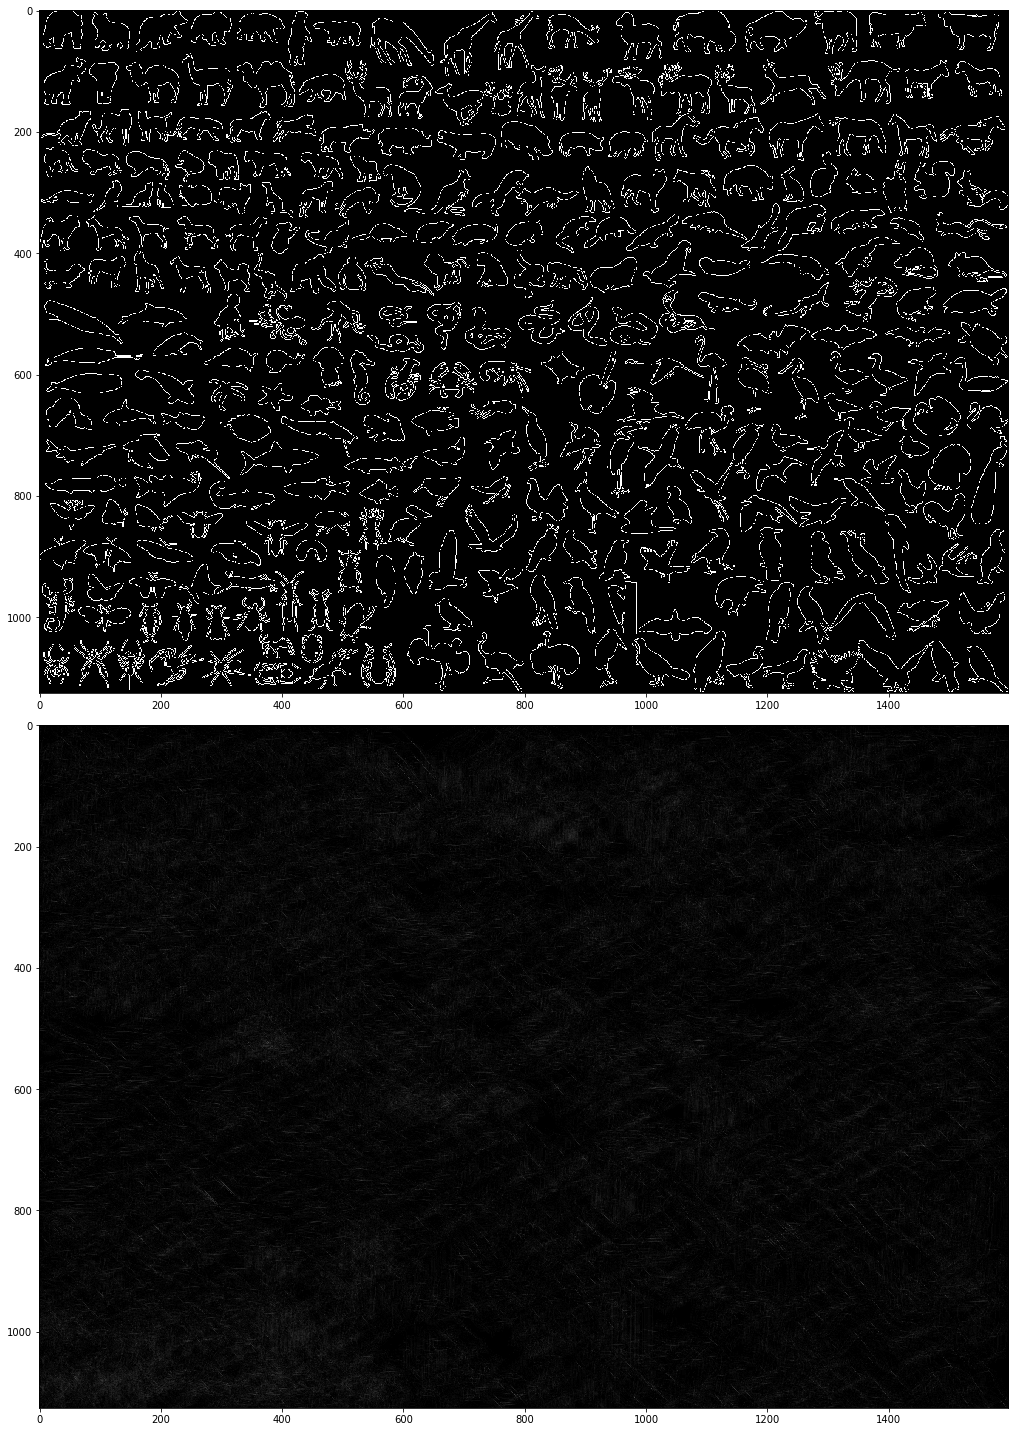

In [62]:
########################################################################################
# JIM
########################################################################################
from collections import defaultdict
from pprint import pprint

from numpy import linalg as LA
from skimage.filters import sobel_h, sobel_v


# Get center of the template.
shape_x, shape_y = bat_edge.shape
center = np.array([shape_x // 2, shape_y // 2])

G_x = b_G_x = sobel_v(bat_edge)
G_y = b_G_y = sobel_h(bat_edge)

# Build an r-table with 20° theta steps.
# (see 02_convolution_canny.ipynb for details)
NUMBER_BINS = 19
bins = np.linspace(-180, 180, num=NUMBER_BINS)
print(bins)
angles = np.degrees(np.arctan2(G_y, G_x))
indices = np.digitize(angles, bins)
theta = np.zeros(angles.shape)
theta[:] = bins[(indices[:] - 1) % (NUMBER_BINS - 1)]
print(theta)


r_table = defaultdict(list)
bat_edge_pixels = np.where(bat_edge == True)
# print(bat_edge_pixels)
for row, col in zip(*bat_edge_pixels):
    angle = theta[row, col]
    p = np.array([col, row])
    v = center - p
    r_table[angle] += [v]
# pprint(r_table)


# Locate the object.
animals_edge = feature.canny(color.rgb2gray(animals), 0.01, low_threshold=0, high_threshold=0.1)
# io.imshow(animals_edge)
G_x = sobel_v(animals_edge)
G_y = sobel_h(animals_edge)
angles = np.degrees(np.arctan2(G_y, G_x))
indices = np.digitize(angles, bins)
theta = np.zeros(angles.shape)
theta[:] = bins[(indices[:] - 1) % (NUMBER_BINS - 1)]
animals_edge_pixels = np.where(animals_edge == True)
acc = np.zeros(animals_edge.shape)
for row, col in zip(*animals_edge_pixels):
    angle = theta[row, col]
    p = np.array([col, row])
#     print(col, row)
    for v_i in r_table[angle]:
        x, y = p + v_i
        t = p + v_i
        if 0 <= t[0] < animals.shape[1] and 0 <= t[1] < animals.shape[0]:
            acc[y, x] += 1
print(acc)


fig, axes = plt.subplots(
    nrows=2,
    ncols=1,
)
fig.set_figwidth(20)
fig.set_figheight(20)
fig.tight_layout()
# plt.subplots_adjust(wspace = .01)
# axes[0].imshow(b_G_x, cmap='gray')
# axes[1].imshow(b_G_y, cmap='gray')
axes[0].imshow(animals_edge, cmap='gray')
axes[1].imshow(acc, cmap='gray')

1127 1556 (55, 71, 3)


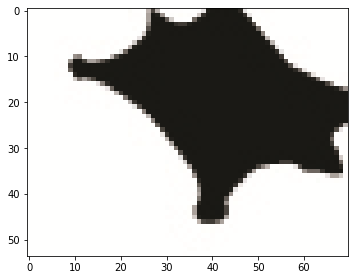

In [63]:
def top_n_indexes(arr, n):
    """See https://gist.github.com/tomerfiliba/3698403"""
    idx = np.argpartition(arr, arr.size - n, axis=None)[-n:]
    width = arr.shape[1]
    return [divmod(i, width) for i in idx]


top_indices = top_n_indexes(acc, n=1)
# print(top_n_indexes(acc, n=4))
best_matched_center = top_indices[0]
cy, cx = best_matched_center
print(y, x, bat.shape)
bat_height, bat_width = bat.shape[:2]
# bat = animals[ymin:ymax, xmin:xmax]

extracted_piece = animals[
    max(cy - bat_height//2, 0):min(cy + bat_height//2, animals.shape[0]),
    max(cx - bat_width//2, 0):min(cx + bat_width//2, animals.shape[1])
]
io.imshow(extracted_piece)

## BONUS 
* now implement an extended version of the GHT that find rotated and scaled variants of the template. 
* find Italy (see "italy.jpg") and the map of Europe ("europe_map_political.gif")
* note that you can binarize your italy template by using a simple color lookup
* draw the location of italy on the map and print its scale and orientation (**BONUS**)